### The graphs that showed the amount of time below ten degrees for 30 min or more between the hours of 9AM-3PM had to be put in another notebook. 
### For some reason the filter function, corrupted all of the graphs that were before it in the notebook.
### In order for us to not have every graph in our project display only the data from 9AM -3PM, we had to put the code for those graphs in a separate notebook.

### Process:

### - Used the pipe operator to chain the multiple instructions together.
### - Used “mutate” function to change the format of the Date_Time_HST column in the dataframe into a date-time format, POSIXct.
### - Used filter function to extract the data recorded between 9AM-3PM.
### - Created a vector to store the data in the specified columns for each sensor position.
### - Used “rowMeans” function to find the mean of the specified columns.
### - Used the comparison operator “< 10” to check to see of the averages calculated above were less than 10 degrees, giving  result of TRUE or FALSE.
### - Used “consecutive count” variable to set up a counter consecutive occurrences in the next steps.
### - Created an empty data frame to later populate it with data points that meet the conditions of the proceeding for loop.
### - Created a for loop to keep track of every time the temp went below 10 degrees for 30 min or more, and records the starting time and the corresponding average temp.
### - Used ggplot to create a graph to show the information.

In [2]:
february_data <- read.csv("path/to/filtered_february_data.csv")

In [3]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
library(lubridate)

Warning message:
“package ‘lubridate’ was built under R version 4.2.3”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
february_data$Date_Time_HST <- ymd_hms(february_data$Date_Time_HST)

In [6]:
str(february_data$Date_Time_HST)

 POSIXct[1:40319], format: "2023-02-01 00:00:37" "2023-02-01 00:01:37" "2023-02-01 00:02:37" ...


In [7]:
february_day_data <- february_data %>%
  group_by(day = day(Date_Time_HST)) %>%
  filter(day %in% 1:28) %>%
  ungroup()

In [8]:
day_28_data <- february_day_data %>%
  filter(day == 28)

In [9]:
day_28_data

Date_Time_HST,AC.Temperature.....C..,A1.Temperature.....C..,A2.Temperature.....C..,A3.Temperature.....C..,A4.Temperature...C..,BC.Temperature.....C..,B1.Temperature.....C.,B2.Temperature.....C..,B3.Temperature.....C..,⋯,C1.Temperature.....C..,C2.Temperature.....C..,C3.Temperature.....C..,C4.Temperature.....C..,DC.Temperature.....C..,D1.Temperature.....C..,D2.Temperature.....C..,D3.Temperature.....C..,D4.Temperature.....C..,day
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2023-02-28 00:00:26,6.86,6.52,6.43,6.39,6.13,6.39,6.56,6.60,6.43,⋯,6.69,6.73,6.60,6.43,6.43,6.69,6.43,6.35,6.39,28
2023-02-28 00:01:26,6.86,6.39,6.43,6.35,6.13,6.35,6.56,6.56,6.48,⋯,6.73,6.69,6.60,6.48,6.43,6.65,6.43,6.39,6.39,28
2023-02-28 00:02:26,6.90,6.39,6.35,6.35,6.05,6.39,6.56,6.69,6.48,⋯,6.69,6.73,6.60,6.48,6.35,6.65,6.43,6.39,6.39,28
2023-02-28 00:03:26,6.82,6.35,6.35,6.30,6.09,6.39,6.56,6.65,6.43,⋯,6.69,6.69,6.65,6.48,6.35,6.60,6.39,6.39,6.35,28
2023-02-28 00:04:26,6.86,6.30,6.39,6.35,6.09,6.39,6.65,6.60,6.48,⋯,6.73,6.69,6.65,6.52,6.35,6.60,6.35,6.39,6.39,28
2023-02-28 00:05:26,6.82,6.30,6.35,6.30,6.09,6.39,6.60,6.65,6.52,⋯,6.73,6.69,6.65,6.56,6.35,6.65,6.43,6.35,6.35,28
2023-02-28 00:06:26,6.86,6.26,6.39,6.35,6.05,6.35,6.65,6.65,6.52,⋯,6.73,6.73,6.69,6.52,6.35,6.60,6.43,6.35,6.39,28
2023-02-28 00:07:26,6.82,6.22,6.39,6.35,6.09,6.39,6.60,6.60,6.52,⋯,6.69,6.69,6.65,6.52,6.39,6.60,6.39,6.35,6.39,28
2023-02-28 00:08:26,6.82,6.26,6.43,6.35,6.09,6.35,6.65,6.65,6.52,⋯,6.73,6.69,6.69,6.52,6.35,6.65,6.43,6.35,6.35,28


In [12]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


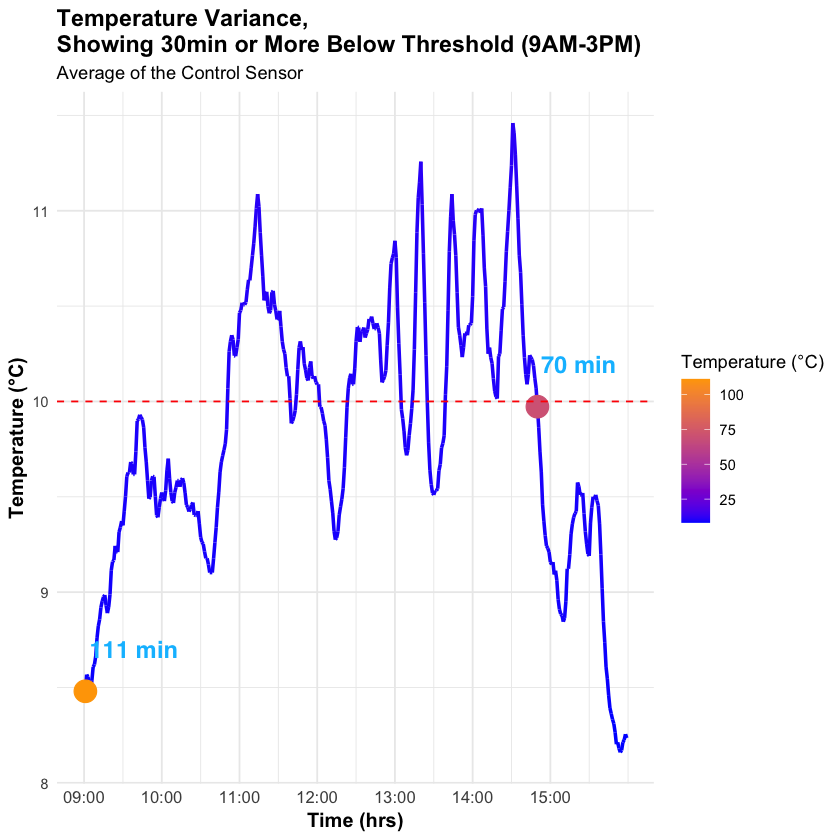

In [13]:
day_28_data <- day_28_data %>%
  # Assuming the time column is in POSIXct format
  mutate(Date_Time_HST = as.POSIXct(Date_Time_HST, format = "%Y-%m-%d %H:%M:%S")) %>%
  # Filter rows between 9 AM and 3 PM
  filter(hour(Date_Time_HST) >= 9, hour(Date_Time_HST) <= 15)

# Columns for control sensors
specified_columns <- c(
  "AC.Temperature.....C..", "BC.Temperature.....C..", "CC.Temperature.....C..", "DC.Temperature.....C.."
)

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y, color = Streak_Length), size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
geom_text(data = subset(highlight_data, Streak_Length >= 30),
          aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
          vjust = -2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans") +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)") +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, 
Showing 30min or More Below Threshold (9AM-3PM)",
       subtitle = "Average of the Control Sensor") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the filtered range
  scale_x_datetime(breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "1 hour"),
                   labels = scales::date_format("%H:%M"))

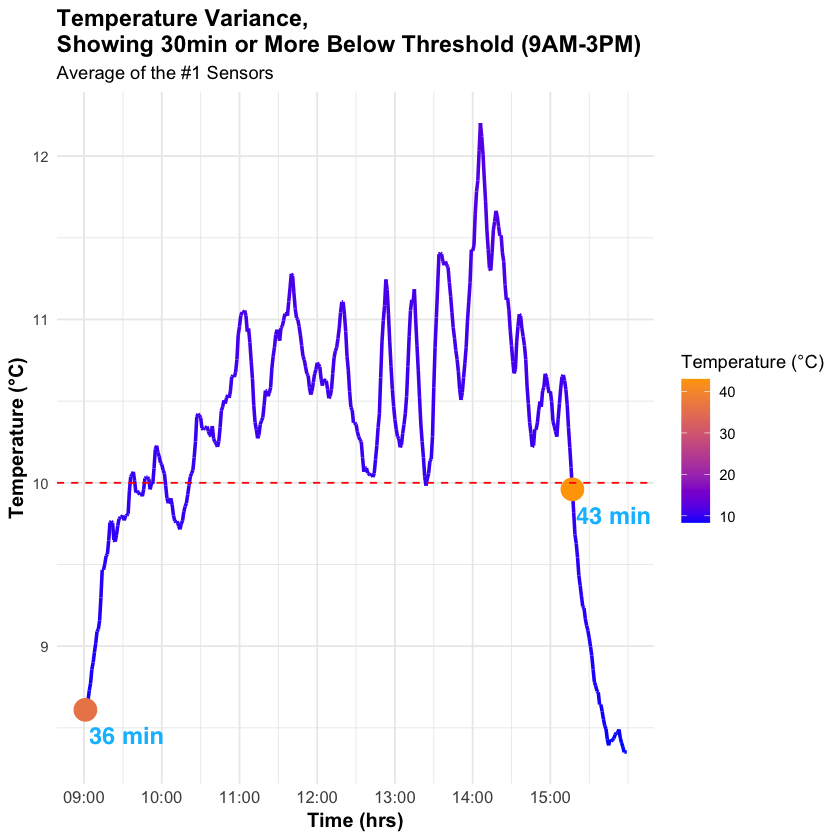

In [14]:
day_28_data <- day_28_data %>%
  # Assuming the time column is in POSIXct format
  mutate(Date_Time_HST = as.POSIXct(Date_Time_HST, format = "%Y-%m-%d %H:%M:%S")) %>%
  # Filter rows between 9 AM and 3 PM
  filter(hour(Date_Time_HST) >= 9, hour(Date_Time_HST) <= 15)

# Columns for control sensors
specified_columns <- c(
  "A1.Temperature.....C..", "B1.Temperature.....C.", "C1.Temperature.....C..", "D1.Temperature.....C.."
)

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y, color = Streak_Length), size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
geom_text(data = subset(highlight_data, Streak_Length >= 30),
          aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
          vjust = 2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)") +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, 
Showing 30min or More Below Threshold (9AM-3PM)",
       subtitle = "Average of the #1 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the filtered range
  scale_x_datetime(breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "1 hour"),
                   labels = scales::date_format("%H:%M"))

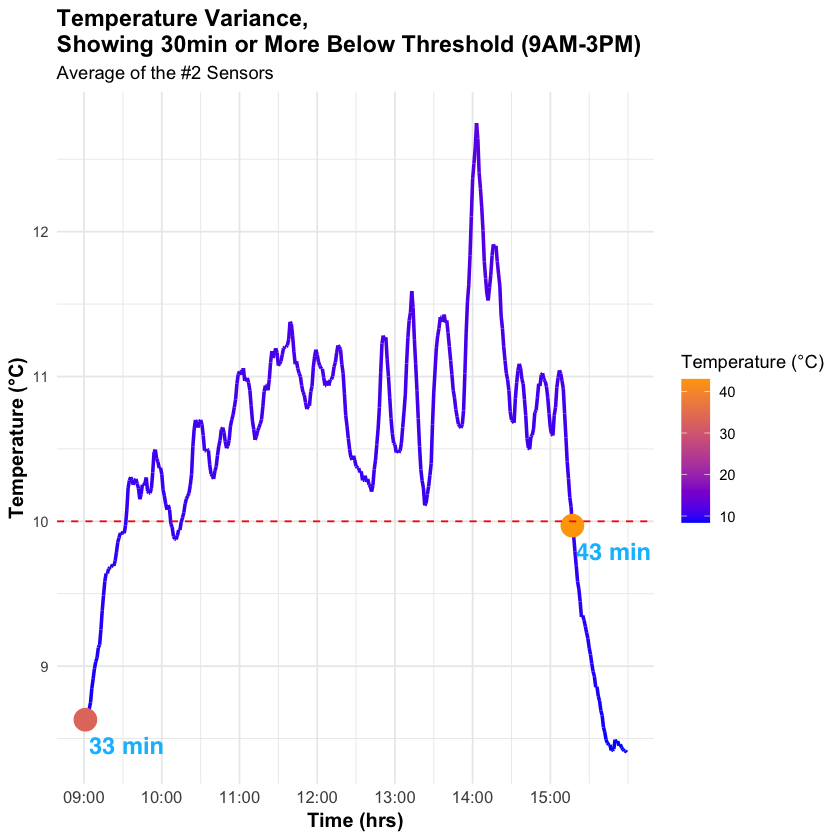

In [15]:
day_28_data <- day_28_data %>%
  # Assuming the time column is in POSIXct format
  mutate(Date_Time_HST = as.POSIXct(Date_Time_HST, format = "%Y-%m-%d %H:%M:%S")) %>%
  # Filter rows between 9 AM and 3 PM
  filter(hour(Date_Time_HST) >= 9, hour(Date_Time_HST) <= 15)

# Columns for control sensors
specified_columns <- c(
  "A2.Temperature.....C..", "B2.Temperature.....C..", "C2.Temperature.....C..", "D2.Temperature.....C.."
)

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y, color = Streak_Length), size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
geom_text(data = subset(highlight_data, Streak_Length >= 30),
          aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
          vjust = 2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)") +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, 
Showing 30min or More Below Threshold (9AM-3PM)",
       subtitle = "Average of the #2 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the filtered range
  scale_x_datetime(breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "1 hour"),
                   labels = scales::date_format("%H:%M"))

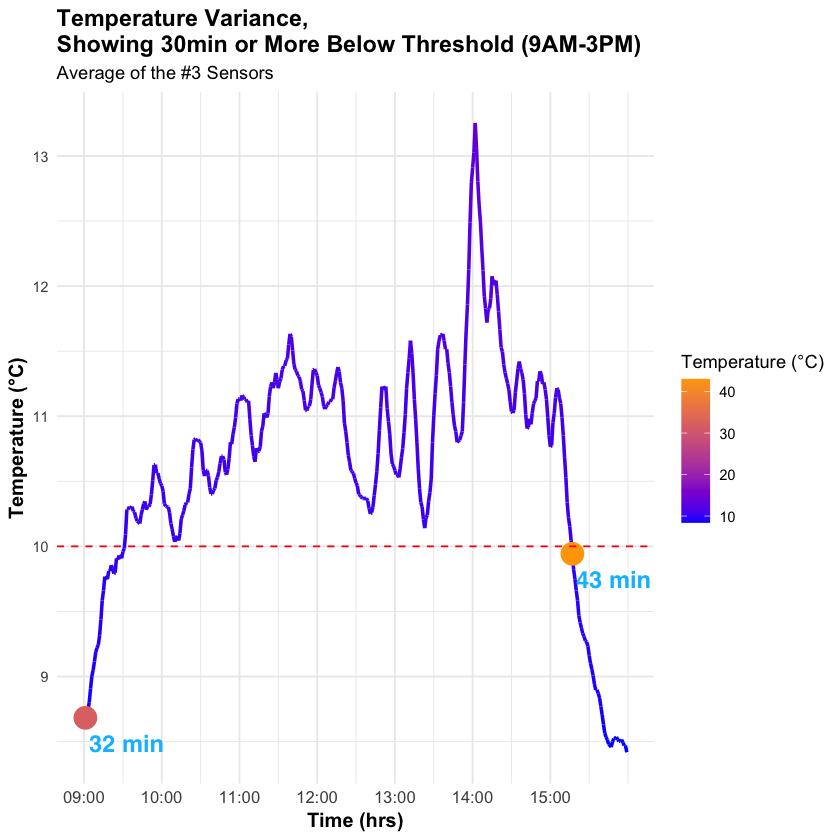

In [16]:
day_28_data <- day_28_data %>%
  # Assuming the time column is in POSIXct format
  mutate(Date_Time_HST = as.POSIXct(Date_Time_HST, format = "%Y-%m-%d %H:%M:%S")) %>%
  # Filter rows between 9 AM and 3 PM
  filter(hour(Date_Time_HST) >= 9, hour(Date_Time_HST) <= 15)

# Columns for control sensors
specified_columns <- c(
  "A3.Temperature.....C..", "B3.Temperature.....C..", "C3.Temperature.....C..", "D3.Temperature.....C.."
)

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y, color = Streak_Length), size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
geom_text(data = subset(highlight_data, Streak_Length >= 30),
          aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
          vjust = 2, hjust = -0.05, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)") +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, 
Showing 30min or More Below Threshold (9AM-3PM)",
       subtitle = "Average of the #3 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the filtered range
  scale_x_datetime(breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "1 hour"),
                   labels = scales::date_format("%H:%M"))

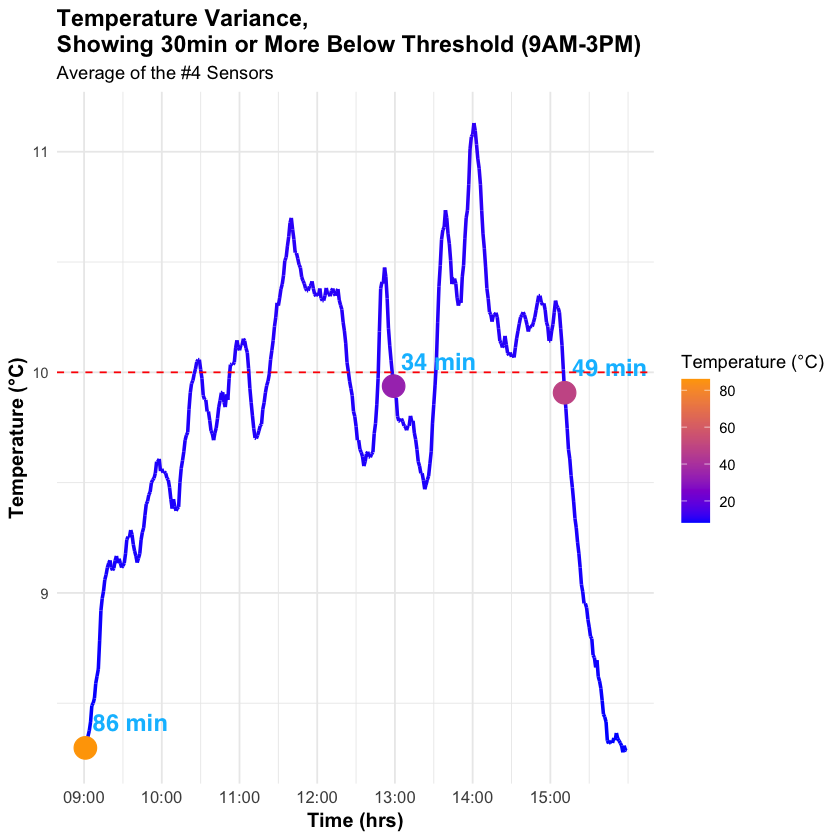

In [17]:
day_28_data <- day_28_data %>%
  # Assuming the time column is in POSIXct format
  mutate(Date_Time_HST = as.POSIXct(Date_Time_HST, format = "%Y-%m-%d %H:%M:%S")) %>%
  # Filter rows between 9 AM and 3 PM
  filter(hour(Date_Time_HST) >= 9, hour(Date_Time_HST) <= 15)

# Columns for control sensors
specified_columns <- c(
  "A4.Temperature...C..", "B4.Temperature.....C..", "C4.Temperature.....C..", "D4.Temperature.....C.."
)

# Calculate the average of every row across specified columns
row_averages_control <- rowMeans(day_28_data[, specified_columns], na.rm = TRUE)

# Identify rows where the average temperature falls below 10 degrees
below_threshold <- row_averages_control < 10

# Initialize variables
consecutive_count <- 0
total_consecutive_below_threshold <- 0
highlight_data <- data.frame(Date_Time_HST = character(), y = numeric(), Streak_Length = integer())

# Check for consecutive rows below 10 degrees
for (i in seq_along(below_threshold)) {
  if (below_threshold[i]) {
    consecutive_count <- consecutive_count + 1
  } else {
    if (consecutive_count >= 30) {
      total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
      highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[i - consecutive_count + 1], 
                                                         y = row_averages_control[i - consecutive_count + 1],
                                                         Streak_Length = consecutive_count))
    }
    consecutive_count <- 0
  }
}

# Check if the last streak extends to the end of the data
if (consecutive_count >= 30) {
  total_consecutive_below_threshold <- total_consecutive_below_threshold + consecutive_count
  highlight_data <- rbind(highlight_data, data.frame(Date_Time_HST = day_28_data$Date_Time_HST[length(day_28_data$Date_Time_HST) - consecutive_count + 1], 
                                                     y = row_averages_control[length(row_averages_control) - consecutive_count + 1],
                                                     Streak_Length = consecutive_count))
}

# Create a ggplot with average temperature values
ggplot(data.frame(Date_Time_HST = day_28_data$Date_Time_HST, y = row_averages_control), 
       aes(x = Date_Time_HST, y = row_averages_control, color = row_averages_control)) +
  
  # Plot the entire column with a gradient color scale
  geom_line(size = 1) +
  
  # Highlight data points for consecutive rows below 10 degrees
  geom_point(data = highlight_data, aes(x = Date_Time_HST, y = y, color = Streak_Length), size = 6) +  # Adjust size here
  
  # Add text labels for streak lengths with improved readability
geom_text(data = subset(highlight_data, Streak_Length >= 30),
          aes(x = Date_Time_HST, y = y, label = paste(Streak_Length, "min")), 
          vjust = -1, hjust = -0.10, size = 5, color = "deepskyblue1", fontface = "bold", alpha = 2.0, family = "sans", position = position_nudge(x = 0.2)) +
  
  # Add a horizontal line at the threshold in red
  geom_hline(yintercept = 10, linetype = "dashed", color = "red") +
  
  # Customize the color scale for values above 10 degrees
  scale_color_gradient(low = "blue", high = "orange", name = "Temperature (°C)") +
  
  # Customize the plot labels and title
  labs(x = "Time (hrs)", y = "Temperature (°C)", 
       title = "Temperature Variance, 
Showing 30min or More Below Threshold (9AM-3PM)",
       subtitle = "Average of the #4 Sensors") +
  
  # Customize the theme (optional)
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),  # Adjust size and boldness here
    axis.title.y = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.title.x = element_text(face = "bold", size = 12),  # Adjust size and boldness here
    axis.text.x = element_text(vjust = 1.5, size = 10)  # Adjust size here
  ) +
  
  # Set x-axis scale based on unique time points within the filtered range
  scale_x_datetime(breaks = seq(min(day_28_data$Date_Time_HST), max(day_28_data$Date_Time_HST), by = "1 hour"),
                   labels = scales::date_format("%H:%M"))